['id', 'group_id', 'group_size', 'local_bkg', 'x_init', 'y_init', 'flux_init', 'x_fit', 'y_fit', 'flux_fit', 'x_err', 'y_err', 'flux_err', 'npixfit', 'qfit', 'cfit', 'reduced_chi2', 'flags', 'roundness1', 'roundness2', 'sharpness', 'skycoord_centroid', 'dra', 'ddec']


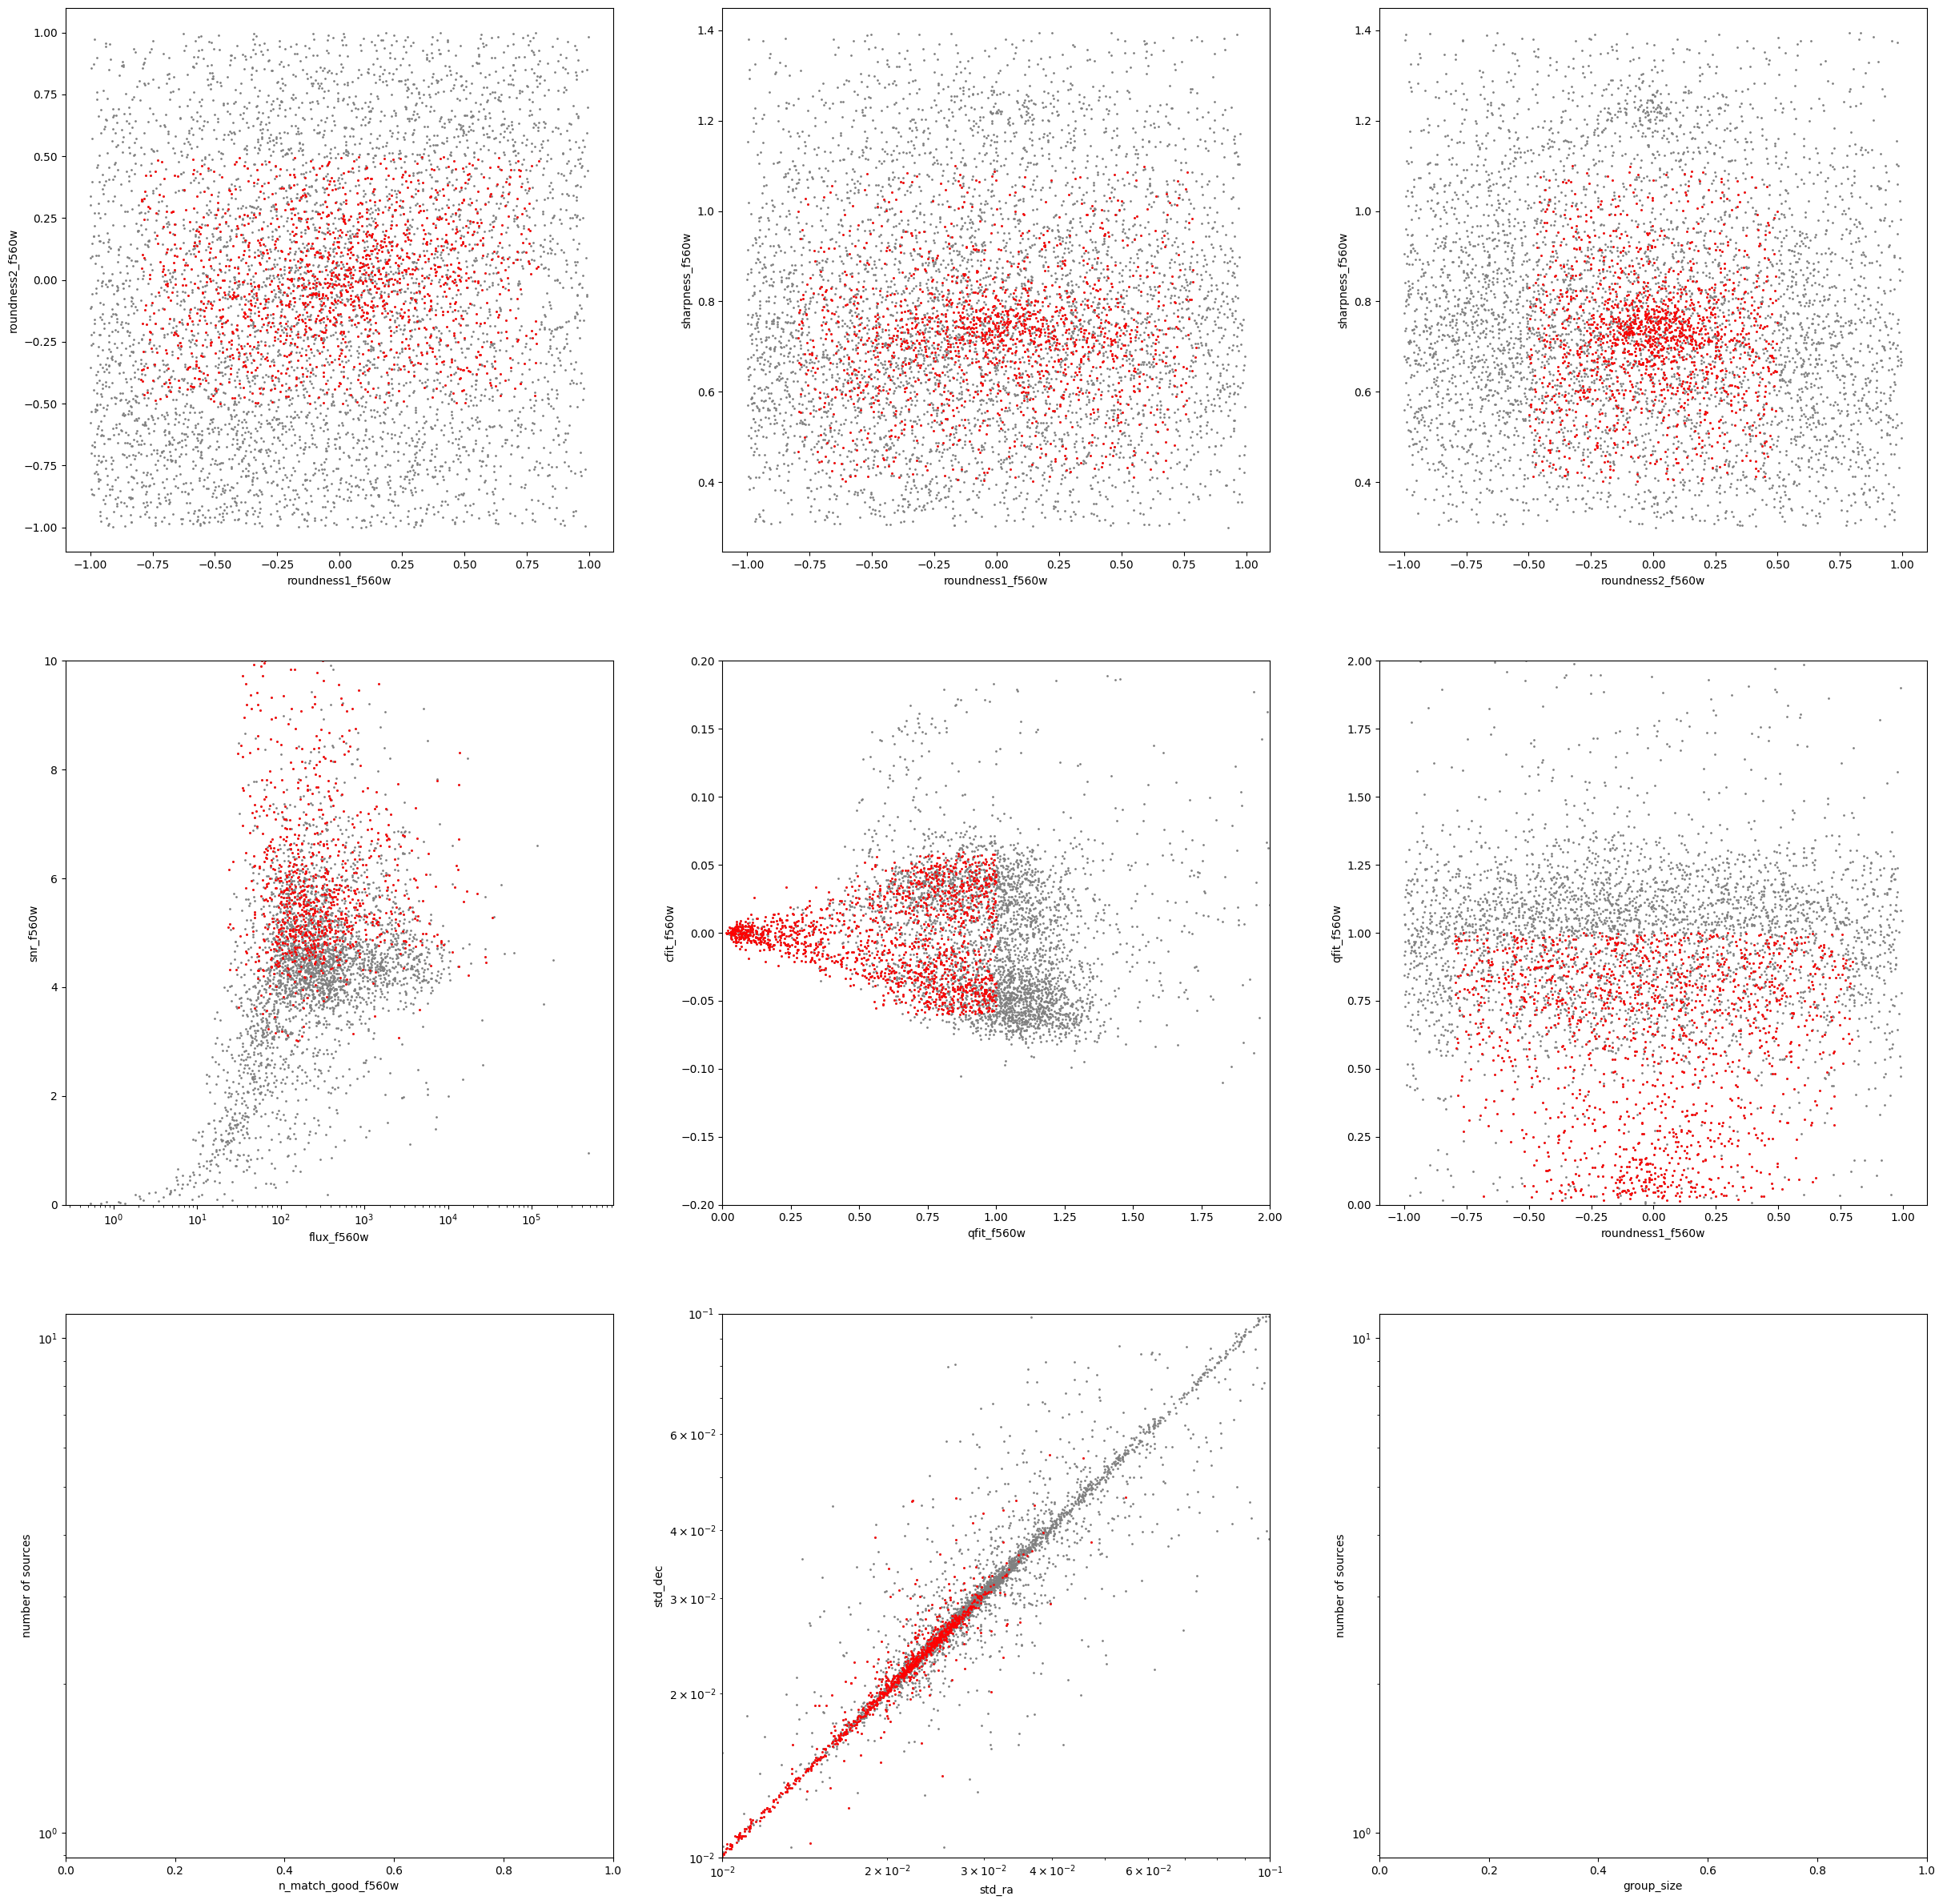

In [50]:
import glob
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import numpy as np
from regions import Regions
from astropy.nddata import Cutout2D
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.table import Table
image_filenames ={
    "f560w": "/orange/adamginsburg/jwst/w51/f560w/pipeline/jw06151-o001_t001_nircam_clear-f560w-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}


filter='f560w'
module='mirimage'
vgroup='2101'
expnum='00001'
visit='002'
#jw06151001001_03109_00007_nrcblong_cal.fits
imgdir = f'/orange/adamginsburg/jwst/w51/{filter.upper()}/'
if filter in ['f140m', 'f162m', 'f182m', 'f187n', 'f210m', 'f335m', 'f360m', 'f410m', 'f430m', 'f444w', 'f460m', 'f480m']:

    img_filename = imgdir + '/pipeline/'+f'jw06151001001_0{vgroup}_{expnum}_{module}_cal.fits'
else:
    img_filename = imgdir + '/pipeline/'+f'jw06151002{visit}_0{vgroup}_{expnum}_{module}_cal.fits'
img = fits.open(img_filename)

#nrca_catalog = Table.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/catalogs/basic_nrca_indivexp_photometry_tables_merged.fits')
#nrcb_catalog = Table.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/catalogs/basic_nrcb_indivexp_photometry_tables_merged.fits')
#catalog_f560w_nrca = Table.read()
cat_basic_filename = imgdir + f'{filter.lower()}_{module}_visit{visit}_vgroup0{vgroup}_exp{expnum}_daophot_basic.fits'
cat_sat_filename = imgdir + '/pipeline/'+f'jw06151002{visit}_0{vgroup}_{expnum}_{module}_cal_satstar_catalog_newnewnewnew.fits'
nrca_catalog = Table.read(cat_basic_filename)
#nrcb_catalog = Table.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/catalogs/f_nrcb_indivexp_merged_dao_after_merger_combined.fits')
#test_regions = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/f560w_refine_test.reg', format='crtf')
#by_eye_sources = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/by_eye_star_f560w.reg', format='crtf')
print(nrca_catalog.colnames)
source_id = nrca_catalog['id']
roundness1_f560w = nrca_catalog['roundness1']
roundness2_f560w = nrca_catalog['roundness2']
sharpness_f560w = nrca_catalog['sharpness']
flux_f560w = nrca_catalog['flux_fit']
fluxerr_f560w = nrca_catalog['flux_err']
snr_f560w = flux_f560w/fluxerr_f560w
qfit_f560w = nrca_catalog['qfit']
cfit_f560w = nrca_catalog['cfit']
#skycoord = nrca_catalog['skycoord']
#n_match = nrca_catalog['nmatch']
#n_match_good_f560w = nrca_catalog['nmatch_good']
std_ra = nrca_catalog['dra']
std_dec = nrca_catalog['ddec']
#group_size = nrca_catalog['group_size']

good_sources = ((roundness1_f560w < 0.8) & (roundness1_f560w > -0.8) & (roundness2_f560w < 0.5) & (roundness2_f560w > -0.5) & (sharpness_f560w < 1.1) & (sharpness_f560w>0.4) 
    & (snr_f560w > 3) & (qfit_f560w < 1.0) & (cfit_f560w < 0.06) & (cfit_f560w > -0.06) )


fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(331)
ax1.scatter(roundness1_f560w, roundness2_f560w, s=1, color='gray')
ax1.scatter(roundness1_f560w[good_sources], roundness2_f560w[good_sources], s=1, color='red')
ax1.set_xlabel('roundness1_f560w')
ax1.set_ylabel('roundness2_f560w')

ax2 = fig.add_subplot(332)
ax2.scatter(roundness1_f560w, sharpness_f560w, s=1, color='gray')
ax2.scatter(roundness1_f560w[good_sources], sharpness_f560w[good_sources], s=1, color='red')
ax2.set_xlabel('roundness1_f560w')
ax2.set_ylabel('sharpness_f560w')   

ax3 = fig.add_subplot(333)
ax3.scatter(roundness2_f560w, sharpness_f560w, s=1, color='gray')
ax3.scatter(roundness2_f560w[good_sources], sharpness_f560w[good_sources], s=1, color='red')
ax3.set_xlabel('roundness2_f560w')
ax3.set_ylabel('sharpness_f560w')

ax4 = fig.add_subplot(334)
ax4.scatter(flux_f560w, snr_f560w, s=1, color='gray')
ax4.scatter(flux_f560w[good_sources], snr_f560w[good_sources], s=1, color='red')
ax4.set_xlabel('flux_f560w')
ax4.set_ylabel('snr_f560w') 
ax4.set_ylim(0,10)
ax4.set_xscale('log')

ax5 = fig.add_subplot(335)
ax5.scatter(qfit_f560w, cfit_f560w, s=1, color='gray')
ax5.scatter(qfit_f560w[good_sources], cfit_f560w[good_sources], s=1, color='red')
ax5.set_xlabel('qfit_f560w')
ax5.set_ylabel('cfit_f560w')   
ax5.set_xlim(0,2)
ax5.set_ylim(-0.2, 0.2)

ax6 = fig.add_subplot(336)
ax6.scatter(roundness1_f560w, qfit_f560w, s=1, color='gray')
ax6.scatter(roundness1_f560w[good_sources], qfit_f560w[good_sources], s=1, color='red')
ax6.set_xlabel('roundness1_f560w')
ax6.set_ylabel('qfit_f560w')
ax6.set_ylim(0,2)


ax7 = fig.add_subplot(337)
#ax7.hist(n_match_good_f560w, bins=np.arange(0, 10), color='gray', alpha=0.5)
#ax7.hist(n_match_good_f560w[good_sources], bins=np.arange(0, 10), color='red', alpha=0.5)
ax7.set_xlabel('n_match_good_f560w')
ax7.set_ylabel('number of sources')
ax7.set_yscale('log')

ax8 = fig.add_subplot(338)
ax8.scatter(std_ra, std_dec, s=1, color='gray')
ax8.scatter(std_ra[good_sources], std_dec[good_sources], s=1, color='red')
ax8.set_xlabel('std_ra')
ax8.set_ylabel('std_dec')
ax8.set_xscale('log')
ax8.set_yscale('log')
ax8.set_xlim(0.01, 0.1)
ax8.set_ylim(0.01, 0.1)

ax9 = fig.add_subplot(339)
#ax9.hist(group_size, bins=np.arange(0, 10), color='gray', alpha=0.5)
#ax9.hist(group_size[good_sources], bins=np.arange(0, 10), color='red', alpha=0.5)
ax9.set_xlabel('group_size')
ax9.set_ylabel('number of sources')
ax9.set_yscale('log')



In [53]:
idx = np.where(source_id==504)
print(roundness1_f560w[idx], roundness2_f560w[idx], sharpness_f560w[idx], snr_f560w[idx], qfit_f560w[idx], cfit_f560w[idx], std_ra[idx], std_dec[idx])
print(good_sources[idx])
xpos = nrca_catalog['x_fit']
ypos = nrca_catalog['y_fit']
print(xpos[idx], ypos[idx])

roundness1
----------
-0.7077183      roundness2     
--------------------
0.045093855688536126     sharpness    
-----------------
0.585465761949787      flux_err    
-----------------
7.794372586008181        qfit       
------------------
0.6282398102186688         cfit        
--------------------
-0.04932589589929178         dra        
       arcsec      
-------------------
0.01616831510768322         ddec        
       arcsec       
--------------------
0.016251832515526123
[True]
      x_fit       
------------------
1016.9184736269093       y_fit      
-----------------
257.7568350810384


In [46]:
img_data = img[1].data
print(img_data.shape)

(1024, 1032)


In [60]:
def plot_zoomed_image(cat_basic_filename, img_data, xcen, ycen, size=50):
    cutout = Cutout2D(img_data, (xcen, ycen), size)
    norm = simple_norm(img_data, 'log', percent=99.)
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    ax1.imshow(cutout.data, norm=norm, origin='lower', cmap='inferno')

    nrca_catalog = Table.read(cat_basic_filename)
    #nrcb_catalog = Table.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/catalogs/f_nrcb_indivexp_merged_dao_after_merger_combined.fits')
    #test_regions = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/f560w_refine_test.reg', format='crtf')
    #by_eye_sources = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/by_eye_star_f560w.reg', format='crtf')
    print(nrca_catalog.colnames)
    roundness1_f560w = nrca_catalog['roundness1']
    roundness2_f560w = nrca_catalog['roundness2']
    sharpness_f560w = nrca_catalog['sharpness']
    flux_f560w = nrca_catalog['flux_fit']
    fluxerr_f560w = nrca_catalog['flux_err']
    snr_f560w = flux_f560w/fluxerr_f560w
    qfit_f560w = nrca_catalog['qfit']
    cfit_f560w = nrca_catalog['cfit']
    #skycoord = nrca_catalog['skycoord']
    #n_match = nrca_catalog['nmatch']
    #n_match_good_f560w = nrca_catalog['nmatch_good']
    std_ra = nrca_catalog['dra']
    std_dec = nrca_catalog['ddec']
    xpos = nrca_catalog['x_fit']
    ypos = nrca_catalog['y_fit']
    source_id = nrca_catalog['id']
    #group_size = nrca_catalog['group_size']

    
    ax1.scatter(xpos-cutout.xmin_original, ypos-cutout.ymin_original, s=300, facecolors='none', edgecolors='cyan')
    ax1.scatter(xpos[good_sources]-cutout.xmin_original, ypos[good_sources]-cutout.ymin_original, s=500, facecolors='none', edgecolors='red')
    for i in range(len(source_id)):
        ax1.text(xpos[i]-cutout.xmin_original+5, ypos[i]-cutout.ymin_original+5, source_id[i], color='white', clip_on=True)
    ax1.set_xlim(0, size)
    ax1.set_ylim(0, size)


['id', 'group_id', 'group_size', 'local_bkg', 'x_init', 'y_init', 'flux_init', 'x_fit', 'y_fit', 'flux_fit', 'x_err', 'y_err', 'flux_err', 'npixfit', 'qfit', 'cfit', 'reduced_chi2', 'flags', 'roundness1', 'roundness2', 'sharpness', 'skycoord_centroid', 'dra', 'ddec']


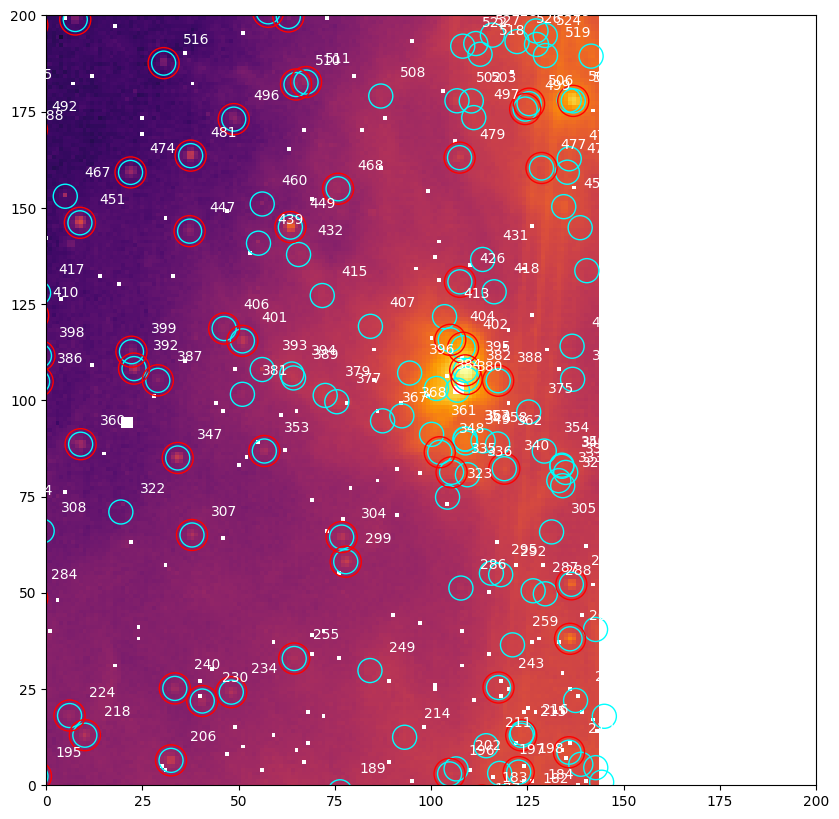

In [61]:
plot_zoomed_image(cat_basic_filename, img_data, xcen=980, ycen=180, size=200)

['id', 'group_id', 'group_size', 'local_bkg', 'x_init', 'y_init', 'flux_init', 'x_fit', 'y_fit', 'flux_fit', 'x_err', 'y_err', 'flux_err', 'npixfit', 'qfit', 'cfit', 'reduced_chi2', 'flags', 'roundness1', 'roundness2', 'sharpness', 'skycoord_centroid', 'dra', 'ddec']


NameError: name 'n_match_good_f560w' is not defined

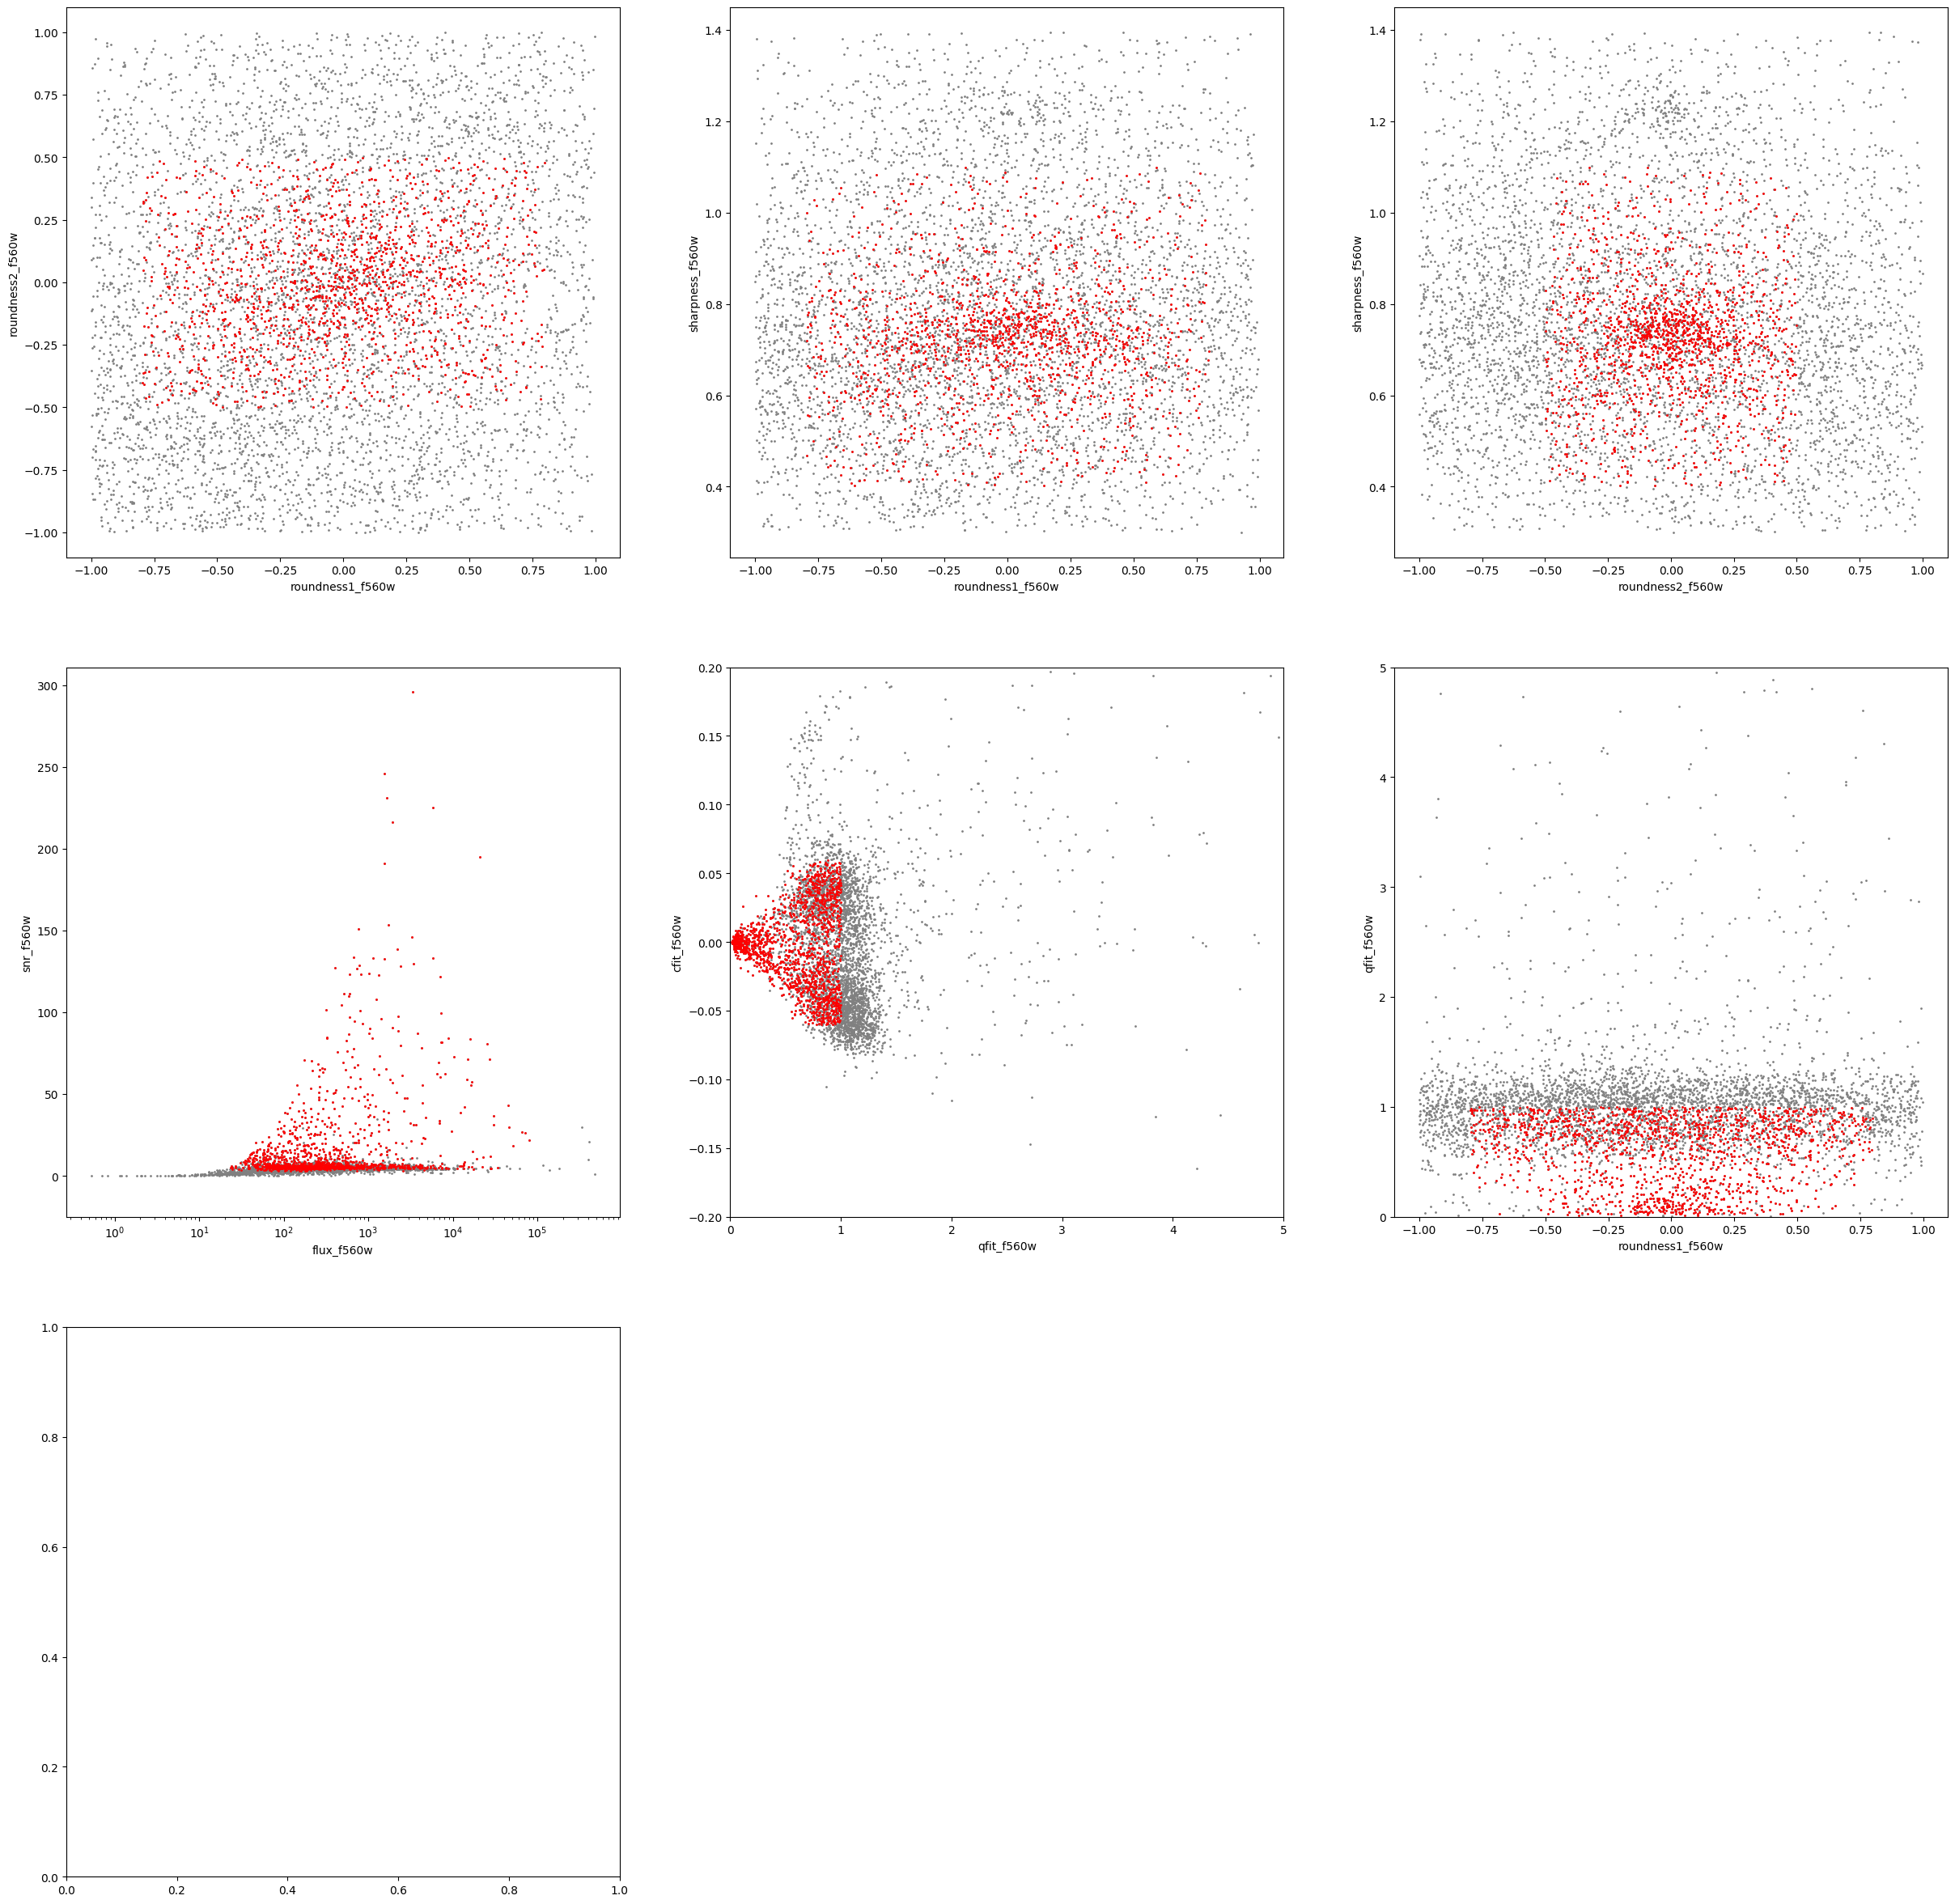

In [49]:

print(nrca_catalog.colnames)



fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(331)
ax1.scatter(roundness1_f560w, roundness2_f560w, s=1, color='gray')
ax1.scatter(roundness1_f560w[good_sources], roundness2_f560w[good_sources], s=1, color='red')
ax1.set_xlabel('roundness1_f560w')
ax1.set_ylabel('roundness2_f560w')

ax2 = fig.add_subplot(332)
ax2.scatter(roundness1_f560w, sharpness_f560w, s=1, color='gray')
ax2.scatter(roundness1_f560w[good_sources], sharpness_f560w[good_sources], s=1, color='red')
ax2.set_xlabel('roundness1_f560w')
ax2.set_ylabel('sharpness_f560w')   

ax3 = fig.add_subplot(333)
ax3.scatter(roundness2_f560w, sharpness_f560w, s=1, color='gray')
ax3.scatter(roundness2_f560w[good_sources], sharpness_f560w[good_sources], s=1, color='red')
ax3.set_xlabel('roundness2_f560w')
ax3.set_ylabel('sharpness_f560w')

ax4 = fig.add_subplot(334)
ax4.scatter(flux_f560w, snr_f560w, s=1, color='gray')
ax4.scatter(flux_f560w[good_sources], snr_f560w[good_sources], s=1, color='red')
ax4.set_xlabel('flux_f560w')
ax4.set_ylabel('snr_f560w') 
ax4.set_xscale('log')

ax5 = fig.add_subplot(335)
ax5.scatter(qfit_f560w, cfit_f560w, s=1, color='gray')
ax5.scatter(qfit_f560w[good_sources], cfit_f560w[good_sources], s=1, color='red')
ax5.set_xlabel('qfit_f560w')
ax5.set_ylabel('cfit_f560w')   
ax5.set_xlim(0,5)
ax5.set_ylim(-0.2, 0.2)

ax6 = fig.add_subplot(336)
ax6.scatter(roundness1_f560w, qfit_f560w, s=1, color='gray')
ax6.scatter(roundness1_f560w[good_sources], qfit_f560w[good_sources], s=1, color='red')
ax6.set_xlabel('roundness1_f560w')
ax6.set_ylabel('qfit_f560w')
ax6.set_ylim(0,5)


ax7 = fig.add_subplot(337)
ax7.hist(n_match_good_f560w, bins=np.arange(0, 10), color='gray', alpha=0.5)
ax7.hist(n_match_good_f560w[good_sources], bins=np.arange(0, 10), color='red', alpha=0.5)
ax7.set_xlabel('n_match_good_f560w')
ax7.set_ylabel('number of sources')
ax7.set_yscale('log')

ax8 = fig.add_subplot(338)
ax8.scatter(std_ra, std_dec, s=1, color='gray')
ax8.scatter(std_ra[good_sources], std_dec[good_sources], s=1, color='red')
ax8.set_xlabel('std_ra')
ax8.set_ylabel('std_dec')

ax9 = fig.add_subplot(339)
ax9.hist(group_size, bins=np.arange(0, 10), color='gray', alpha=0.5)
ax9.hist(group_size[good_sources], bins=np.arange(0, 10), color='red', alpha=0.5)
ax9.set_xlabel('group_size')
ax9.set_ylabel('number of sources')
ax9.set_yscale('log')


197 56407 197
[31068 31119 39454 31093 31078 31062 31051 31025 31024 35710 30944 30943
 31011 31009 30982 30883 30886 30876 30798 30724 30767 30790 30821 30791
 30847 30834 30853 30829 30877 30867 30945 30946 30936 30961 35581 30759
 30771 30816 30792 30784 30774 30809 30822 30835 30764 30772 30787 30844
 30836 30937 30894 30870 30858 30907 30910 30935 30845 30873 30731 30801
 30794 30837 30884 30897 31034 31027 31023 30998 42270 31022 31017 31095
 31083 31112 31076 31066 45568 45550 45552 45556 45478 45478 45518 45537
 45517 49514 45488 45410 45356 45321 45399 45237 45220 45112 45102 45182
 45288 45260 45464 45471 45419 45493 45401 45085 45041 45073 45155 45142
 49353 45045 45029 45025 45033 45034 45137 45153 49565 45213 45191 49276
 45322 45277 45297 49513 45592 45457 17962 14349 17940 14331 17775 17806
 17669 17649 17399 17836 17805 17977 18039 14283 14386 14350 14327 11136
 17614 17497 17351 17379 17314 17146 17192 17201 17437 16923 16933 16902
 16882 16997  6072   443 13856 13865 

Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


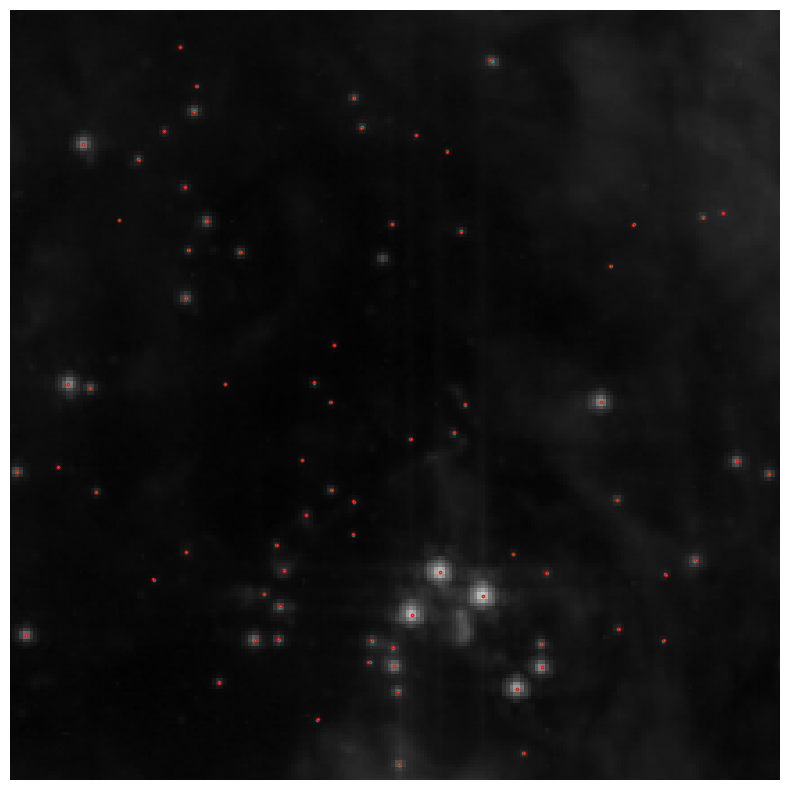

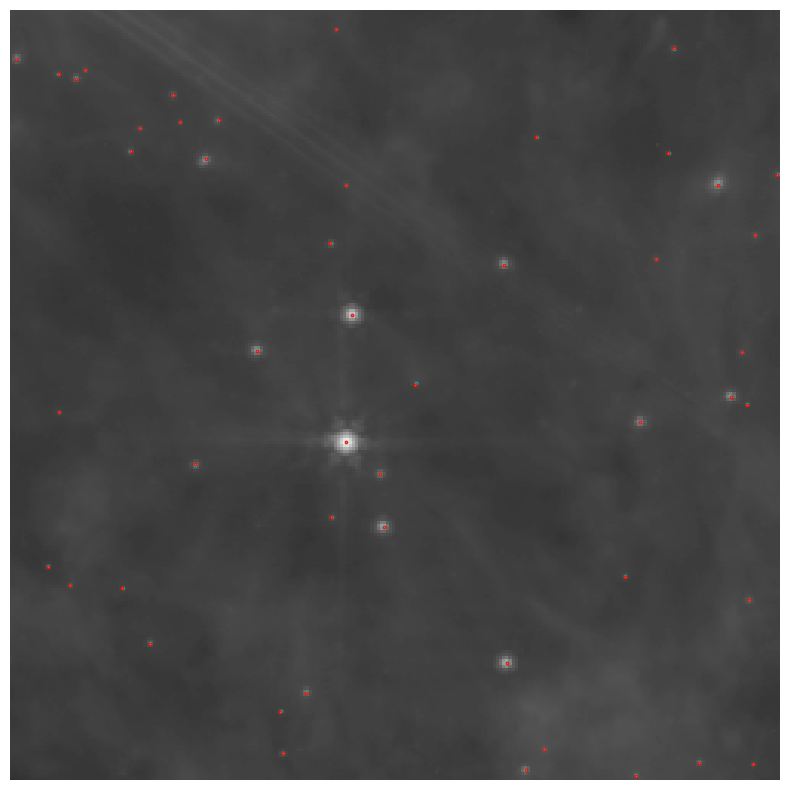

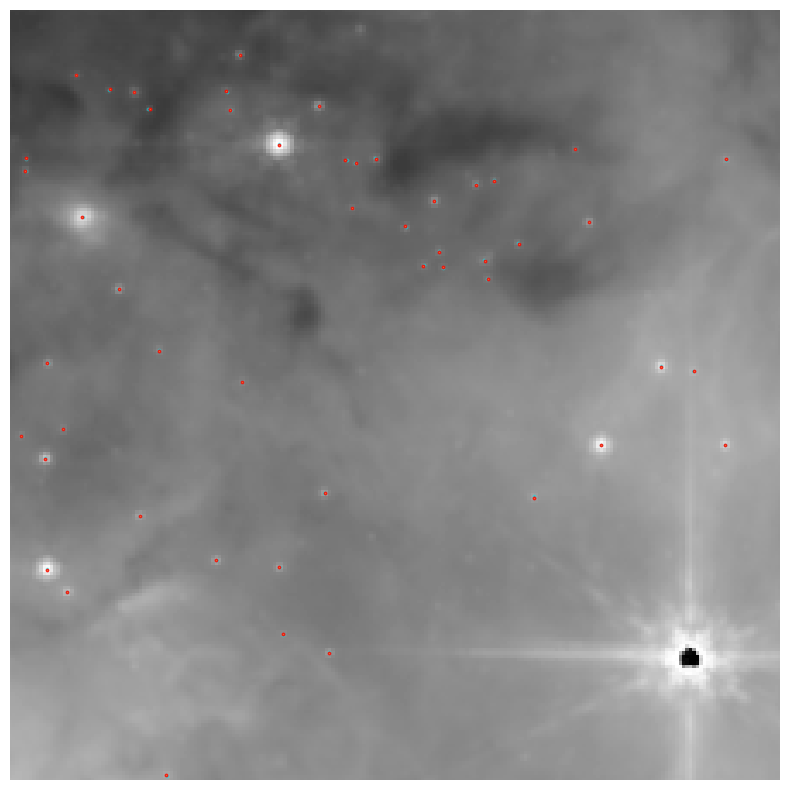

In [ ]:
idx, d2d, d3d = by_eye_skycoord.match_to_catalog_sky(nrca_catalog['skycoord'])
print(len(idx), len(nrca_catalog['skycoord']), len(by_eye_skycoord))
print(idx)
matched = d2d < 0.15*u.arcsec
print(f'{len(matched==True)} sources out of {len(matched)} matched within 0.1 arcsec')
matched_skycoord = nrca_catalog['skycoord'][idx[matched]]
contains_arr = np.zeros(len(nrca_catalog['skycoord']), dtype=bool)
for reg in test_regions:
    filename = image_filenames['f560w']
    hdu = fits.open(filename)
    data = hdu[1].data if len(hdu) > 1 else hdu[0].data
    wcs = WCS(hdu[1].header if len(hdu) > 1 else hdu[0].header)
    cutout = Cutout2D(data, reg.center, (reg.height, reg.width), wcs=wcs)
    norm = simple_norm(data, 'log', percent=99.95)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': cutout.wcs})
    ax.imshow(cutout.data, norm=norm, origin='lower', cmap='gray')
    skycoord_ref = nrca_catalog['skycoord']
    contains = reg.contains(skycoord_ref, wcs)
    contains_arr[contains] = True
    #convert skycoordinates to pixel coordinates in the cutout
    pixcoords_matched = cutout.wcs.world_to_pixel(matched_skycoord)
    pixcoords_by_eye_skycoord = cutout.wcs.world_to_pixel(by_eye_skycoord[matched])


    ra = pixcoords_matched[0]
    dec = pixcoords_matched[1]
    ax.scatter(ra, dec, s=3, edgecolor='cyan', alpha=0.4)
    ra = pixcoords_by_eye_skycoord[0]
    dec = pixcoords_by_eye_skycoord[1]
    ax.scatter(ra, dec, s=3, edgecolor='red', alpha=0.8)
    #ra = pixcoords[0][index] --- IGNORE
    ax.axis('off')
    ax.set_xlim(cutout.xmin_cutout, cutout.xmax_cutout)
    ax.set_ylim(cutout.ymin_cutout, cutout.ymax_cutout)

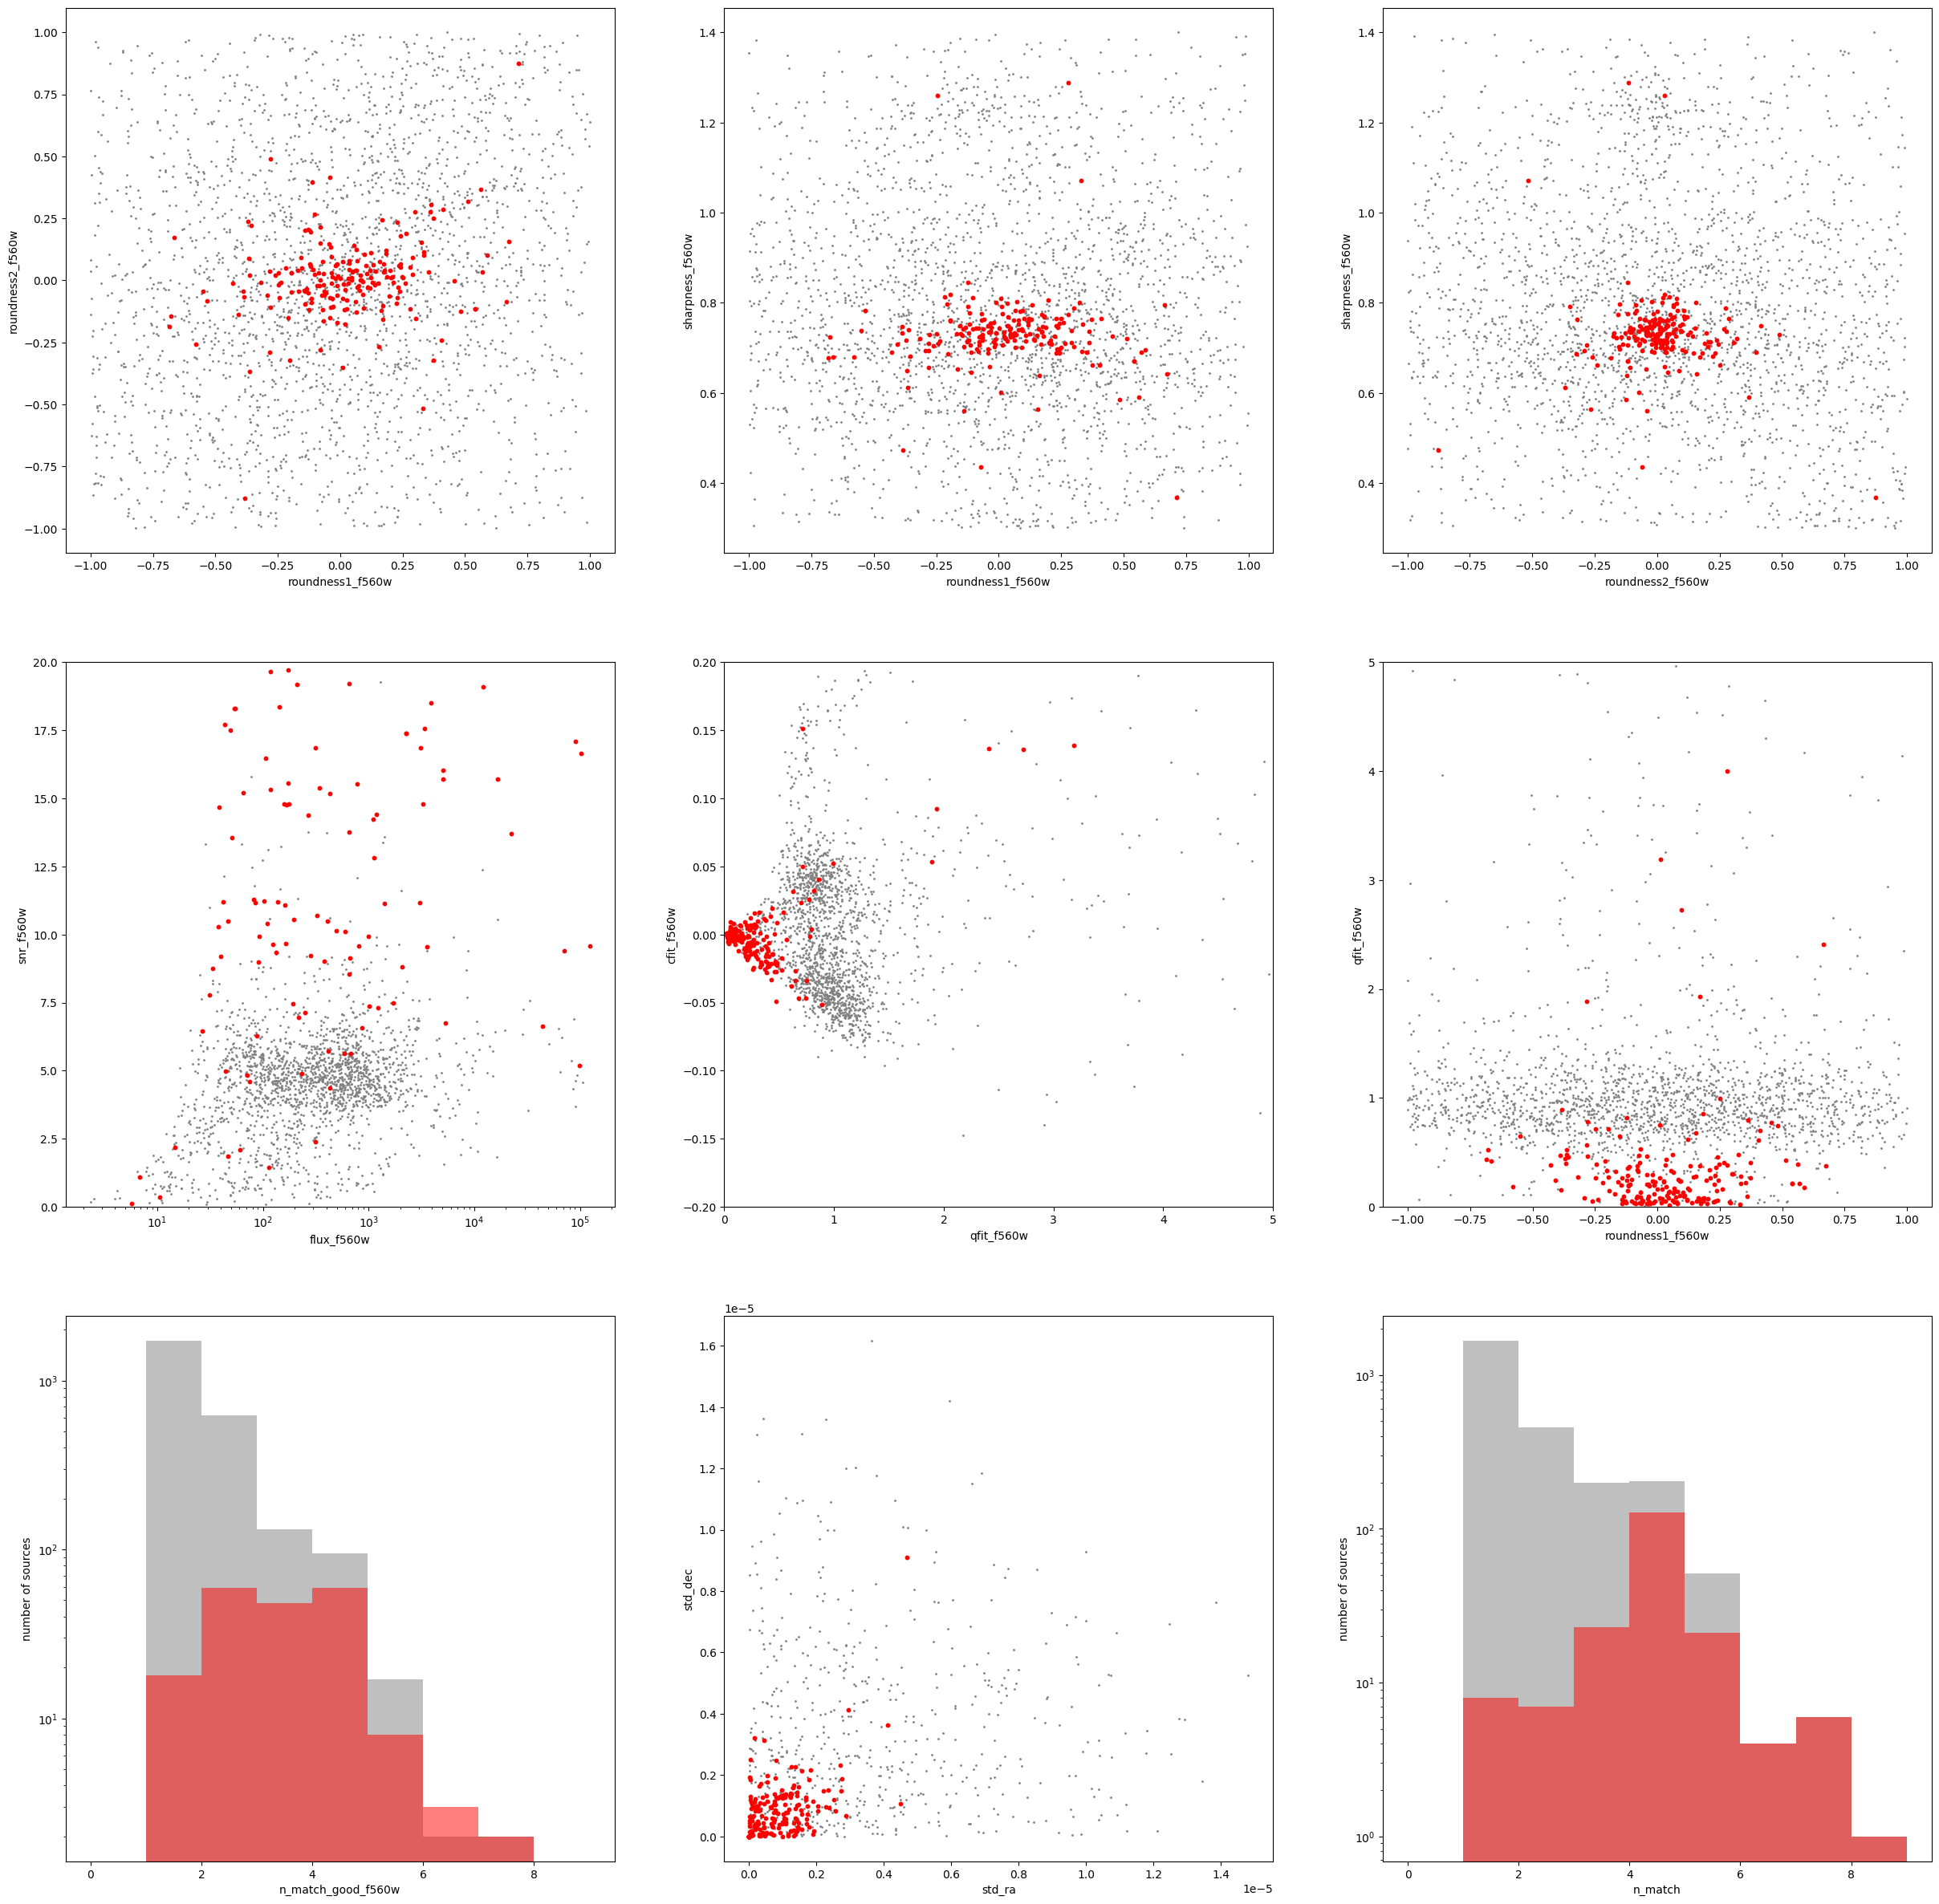

In [ ]:
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(331)
ax1.scatter(roundness1_f560w[contains_arr], roundness2_f560w[contains_arr], s=1, color='gray')
ax1.scatter(roundness1_f560w[idx], roundness2_f560w[idx], s=10, color='red')
ax1.set_xlabel('roundness1_f560w')
ax1.set_ylabel('roundness2_f560w')

ax2 = fig.add_subplot(332)
ax2.scatter(roundness1_f560w[contains_arr], sharpness_f560w[contains_arr], s=1, color='gray')
ax2.scatter(roundness1_f560w[idx], sharpness_f560w[idx], s=10, color='red')
ax2.set_xlabel('roundness1_f560w')
ax2.set_ylabel('sharpness_f560w')   

ax3 = fig.add_subplot(333)
ax3.scatter(roundness2_f560w[contains_arr], sharpness_f560w[contains_arr], s=1, color='gray')
ax3.scatter(roundness2_f560w[idx], sharpness_f560w[idx], s=10, color='red')
ax3.set_xlabel('roundness2_f560w')
ax3.set_ylabel('sharpness_f560w')   

ax4 = fig.add_subplot(334)
ax4.scatter(flux_f560w[contains_arr], snr_f560w[contains_arr], s=1, color='gray')
ax4.scatter(flux_f560w[idx], snr_f560w[idx], s=10, color='red')
ax4.set_xlabel('flux_f560w')
ax4.set_ylabel('snr_f560w') 
ax4.set_ylim(0,20)
ax4.set_xscale('log')

ax5 = fig.add_subplot(335)
ax5.scatter(qfit_f560w[contains_arr], cfit_f560w[contains_arr], s=1, color='gray')
ax5.scatter(qfit_f560w[idx], cfit_f560w[idx], s=10, color='red')
ax5.set_xlabel('qfit_f560w')
ax5.set_ylabel('cfit_f560w')   
ax5.set_xlim(0,5)
ax5.set_ylim(-0.2, 0.2)

ax6 = fig.add_subplot(336)
ax6.scatter(roundness1_f560w[contains_arr], qfit_f560w[contains_arr], s=1, color='gray')
ax6.scatter(roundness1_f560w[idx], qfit_f560w[idx], s=10, color='red')
ax6.set_xlabel('roundness1_f560w')
ax6.set_ylabel('qfit_f560w')
ax6.set_ylim(0,5)

ax7 = fig.add_subplot(337)
ax7.hist(n_match_good_f560w[contains_arr], bins=np.arange(0, 10), color='gray', alpha=0.5)
ax7.hist(n_match_good_f560w[idx], bins=np.arange(0, 10), color='red', alpha=0.5)
ax7.set_xlabel('n_match_good_f560w')
ax7.set_ylabel('number of sources')
ax7.set_yscale('log')

ax8 = fig.add_subplot(338)
ax8.scatter(std_ra[contains_arr], std_dec[contains_arr], s=1, color='gray')
ax8.scatter(std_ra[idx], std_dec[idx], s=10, color='red')
ax8.set_xlabel('std_ra')
ax8.set_ylabel('std_dec')

ax9 = fig.add_subplot(339)
ax9.hist(n_match[contains_arr], bins=np.arange(0, 10), color='gray', alpha=0.5)
ax9.hist(n_match[idx], bins=np.arange(0, 10), color='red', alpha=0.5)
ax9.set_xlabel('n_match')
ax9.set_ylabel('number of sources')
ax9.set_yscale('log')

(0.0, 5.0)

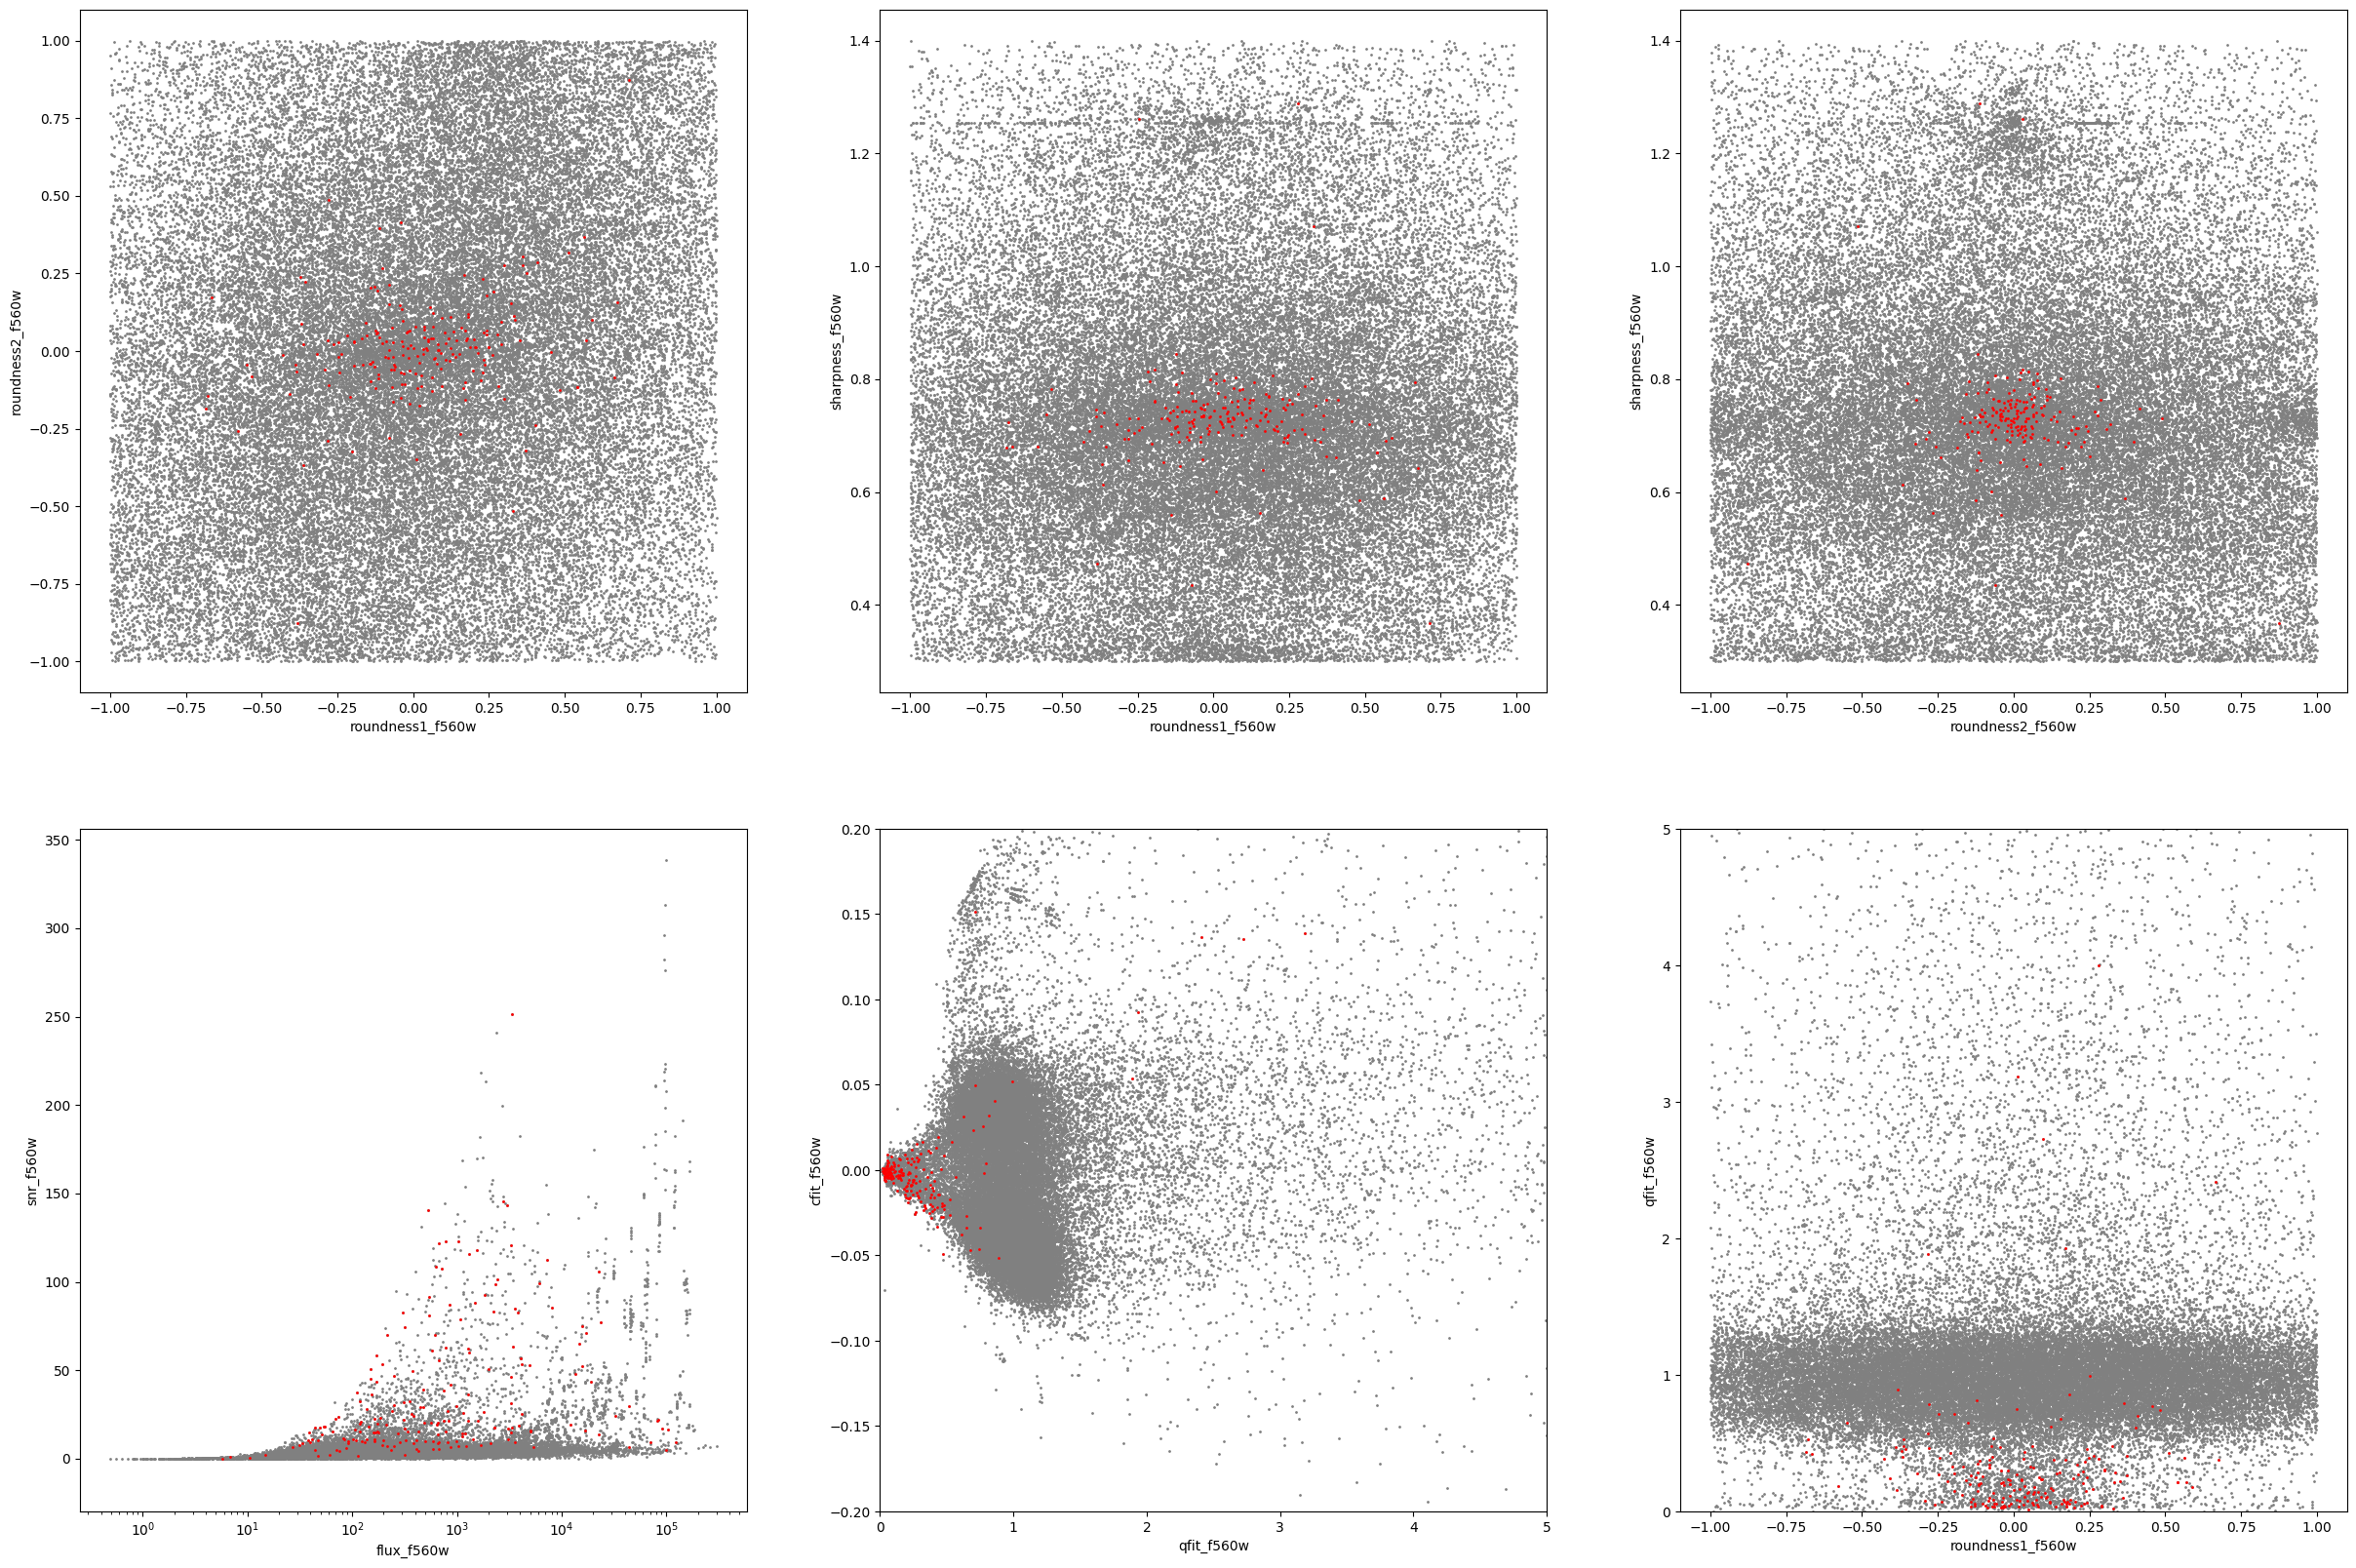

In [ ]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(231)
ax1.scatter(roundness1_f560w, roundness2_f560w, s=1, color='gray')
ax1.scatter(roundness1_f560w[idx], roundness2_f560w[idx], s=1, color='red')
ax1.set_xlabel('roundness1_f560w')
ax1.set_ylabel('roundness2_f560w')

ax2 = fig.add_subplot(232)
ax2.scatter(roundness1_f560w, sharpness_f560w, s=1, color='gray')
ax2.scatter(roundness1_f560w[idx], sharpness_f560w[idx], s=1, color='red')
ax2.set_xlabel('roundness1_f560w')
ax2.set_ylabel('sharpness_f560w')   

ax3 = fig.add_subplot(233)
ax3.scatter(roundness2_f560w, sharpness_f560w, s=1, color='gray')
ax3.scatter(roundness2_f560w[idx], sharpness_f560w[idx], s=1, color='red')
ax3.set_xlabel('roundness2_f560w')
ax3.set_ylabel('sharpness_f560w')   

ax4 = fig.add_subplot(234)
ax4.scatter(flux_f560w, snr_f560w, s=1, color='gray')
ax4.scatter(flux_f560w[idx], snr_f560w[idx], s=1, color='red')
ax4.set_xlabel('flux_f560w')
ax4.set_ylabel('snr_f560w') 
ax4.set_xscale('log')

ax5 = fig.add_subplot(235)
ax5.scatter(qfit_f560w, cfit_f560w, s=1, color='gray')
ax5.scatter(qfit_f560w[idx], cfit_f560w[idx], s=1, color='red')
ax5.set_xlabel('qfit_f560w')
ax5.set_ylabel('cfit_f560w')   
ax5.set_xlim(0,5)
ax5.set_ylim(-0.2, 0.2)

ax6 = fig.add_subplot(236)
ax6.scatter(roundness1_f560w, qfit_f560w, s=1, color='gray')
ax6.scatter(roundness1_f560w[idx], qfit_f560w[idx], s=1, color='red')
ax6.set_xlabel('roundness1_f560w')
ax6.set_ylabel('qfit_f560w')
ax6.set_ylim(0,5)

Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


[0.0118088 arcsec]
[0.0146605 arcsec]
[1.62223 arcsec]
[0.0211951 arcsec]
[0.0294862 arcsec]
[0.0199344 arcsec]
[0.00870003 arcsec]
[0.0250059 arcsec]
[0.0569431 arcsec]
[1.08946 arcsec]
[0.0229612 arcsec]
[0.0142499 arcsec]
[0.020415 arcsec]
[0.010416 arcsec]
[0.0340696 arcsec]
[0.0207015 arcsec]
[0.00635545 arcsec]
[0.0279103 arcsec]
[0.0390353 arcsec]
[0.902766 arcsec]
[0.367341 arcsec]
[0.0234429 arcsec]
[0.00315541 arcsec]
[0.0110426 arcsec]
[0.261092 arcsec]
[0.0514007 arcsec]
[0.300988 arcsec]
[0.0212667 arcsec]
[0.00817064 arcsec]
[0.0394166 arcsec]
[0.0332366 arcsec]
[0.00535922 arcsec]
[0.0224869 arcsec]
[0.0230623 arcsec]
[0.0367614 arcsec]
[0.00300819 arcsec]
[0.00976903 arcsec]
[0.02614 arcsec]
[0.0104505 arcsec]
[0.0143229 arcsec]
[0.0070582 arcsec]
[0.0193601 arcsec]
[0.0131254 arcsec]
[0.0377871 arcsec]
[0.0375331 arcsec]
[0.0144969 arcsec]
[0.0103013 arcsec]
[0.422664 arcsec]
[0.00906956 arcsec]
[0.00817937 arcsec]
[0.0172249 arcsec]
[0.0274047 arcsec]
[0.0113413 arcse

Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


[0.00799496 arcsec]
[0.0260707 arcsec]
[0.640604 arcsec]
[0.0338312 arcsec]
[0.043934 arcsec]
[0.0353502 arcsec]
[0.0714103 arcsec]
[2.48285 arcsec]
[0.0137877 arcsec]
[3.2753 arcsec]
[0.0324898 arcsec]
[0.0547987 arcsec]
[0.0182032 arcsec]
[1.65377 arcsec]
[0.0170744 arcsec]
[0.0224287 arcsec]
[3.56204 arcsec]
[0.5624 arcsec]
[0.0187718 arcsec]
[0.320144 arcsec]
[3.47719 arcsec]
[0.0158407 arcsec]
[2.14279 arcsec]
[0.0432305 arcsec]
[0.0757335 arcsec]
[2.78823 arcsec]
[0.0164367 arcsec]
[0.00683906 arcsec]
[1.01973 arcsec]
[0.0250958 arcsec]
[3.15083 arcsec]
[0.0349338 arcsec]
[0.0116577 arcsec]
[2.43039 arcsec]
[0.0101796 arcsec]
[0.00700921 arcsec]
[2.45274 arcsec]
[0.01225 arcsec]
[0.0465246 arcsec]
[0.0262432 arcsec]
[0.0356483 arcsec]
[0.00692297 arcsec]
[1.16246 arcsec]
[0.0222834 arcsec]
[0.017442 arcsec]
[0.0296244 arcsec]
[0.017054 arcsec]
[0.0302338 arcsec]
[0.973407 arcsec]
[0.0398121 arcsec]
[0.0266364 arcsec]
[0.241521 arcsec]
[0.013675 arcsec]
[0.0311328 arcsec]
[0.01283

Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


[0.00924145 arcsec]
[2.7958 arcsec]
[3.83852 arcsec]
[2.22809 arcsec]
[0.0418201 arcsec]
[0.0185612 arcsec]
[0.0148835 arcsec]
[0.0475111 arcsec]
[0.014514 arcsec]
[0.0215722 arcsec]
[2.58411 arcsec]
[0.018376 arcsec]
[0.029756 arcsec]
[0.0249086 arcsec]
[0.0195691 arcsec]
[0.0153789 arcsec]
[0.0278177 arcsec]
[0.0328593 arcsec]
[3.09434 arcsec]
[0.0175425 arcsec]
[2.95511 arcsec]
[2.82064 arcsec]
[0.0335525 arcsec]
[1.8768 arcsec]
[0.0418926 arcsec]
[0.0101263 arcsec]
[0.446519 arcsec]
[4.34196 arcsec]
[2.78981 arcsec]
[0.00825223 arcsec]
[3.42477 arcsec]
[0.0204045 arcsec]
[0.0389031 arcsec]
[0.395526 arcsec]
[0.160918 arcsec]
[0.0263366 arcsec]
[2.80479 arcsec]
[3.70452 arcsec]
[4.10357 arcsec]
[3.21553 arcsec]
[0.518533 arcsec]
[1.4049 arcsec]
[0.0178182 arcsec]
[0.0117401 arcsec]
[0.0171242 arcsec]
[2.11574 arcsec]
[0.0255802 arcsec]
[1.02459 arcsec]
[0.0136365 arcsec]
[0.0372835 arcsec]
[4.03067 arcsec]
[4.16016 arcsec]
[5.2204 arcsec]
[0.777968 arcsec]
[0.0244498 arcsec]
[0.0203

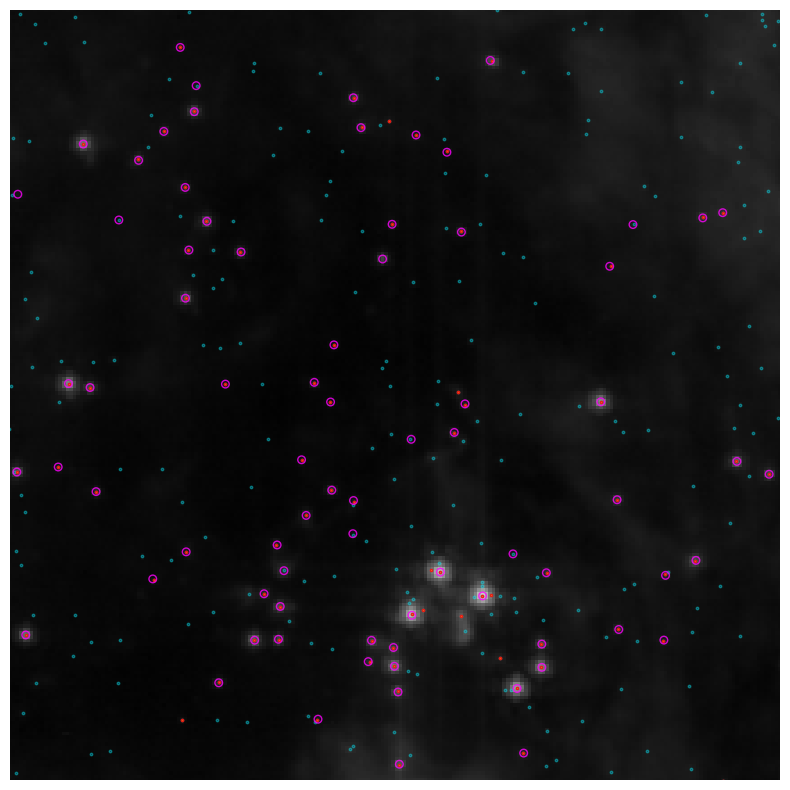

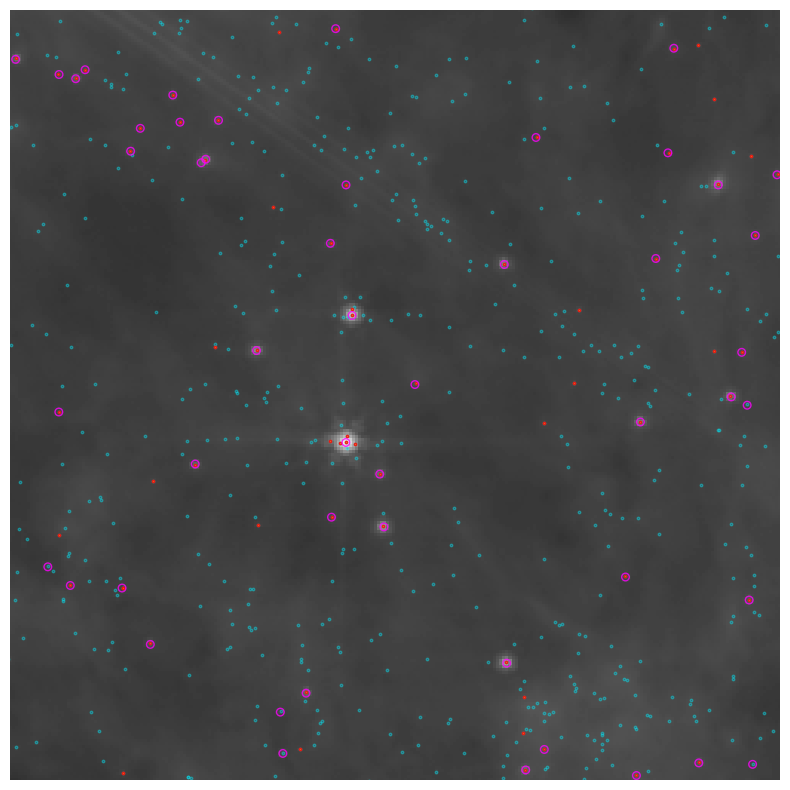

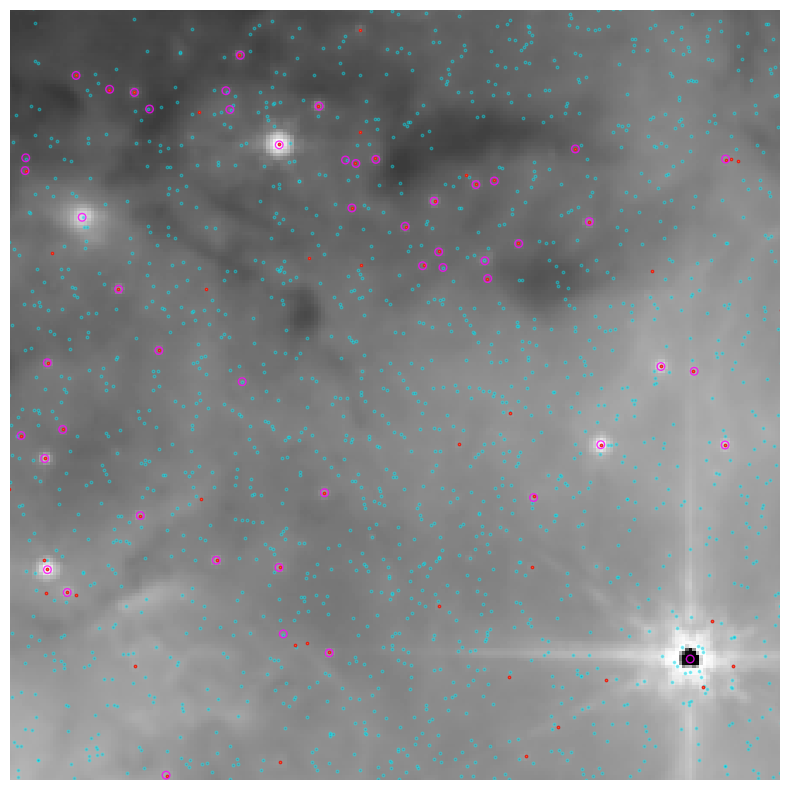

In [ ]:




n_false_detection = 0
n_detection = 0
for reg in test_regions:
    filename = image_filenames['f560w']
    hdu = fits.open(filename)
    data = hdu[1].data if len(hdu) > 1 else hdu[0].data
    wcs = WCS(hdu[1].header if len(hdu) > 1 else hdu[0].header)
    cutout = Cutout2D(data, reg.center, (reg.height, reg.width), wcs=wcs)
    norm = simple_norm(data, 'log', percent=99.95)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': cutout.wcs})
    ax.imshow(cutout.data, norm=norm, origin='lower', cmap='gray')
    skycoord_ref = nrca_catalog['skycoord']
    skycoord_ref_good = nrca_catalog['skycoord'][good_sources]
    #convert skycoordinates to pixel coordinates in the cutout
    pixcoords = cutout.wcs.world_to_pixel(skycoord_ref)
    pixcoords_by_eye_skycoord = cutout.wcs.world_to_pixel(by_eye_skycoord)
  
    ra = pixcoords[0]
    dec = pixcoords[1]
    ax.scatter(ra, dec, s=3, edgecolor='cyan', alpha=0.4)
    ra = pixcoords[0][good_sources]
    dec = pixcoords[1][good_sources]
    ax.scatter(ra, dec, s=3, edgecolor='red', alpha=0.8)
    num_good = np.sum(good_sources)

    ra_by_eye = pixcoords_by_eye_skycoord[0]
    dec_by_eye = pixcoords_by_eye_skycoord[1]
    ax.scatter(ra_by_eye, dec_by_eye, s=30, edgecolor='magenta', facecolor='none', alpha=0.8)
    #ra = pixcoords[0][index] --- IGNORE
    ax.axis('off')
    ax.set_xlim(cutout.xmin_cutout, cutout.xmax_cutout)
    ax.set_ylim(cutout.ymin_cutout, cutout.ymax_cutout)

    # number of false detection in the cutout region
    for i in range(num_good):
        if reg.contains(skycoord_ref_good[i], wcs):
            idx, d2d, d3d = skycoord_ref_good[i].match_to_catalog_sky(by_eye_skycoord)
            n_detection += 1
            print(d2d.to(u.arcsec))
            if d2d[0] > 0.1*u.arcsec:
                n_false_detection += 1
print(f'Number of false detection in the region centered at RA: {reg.center.ra.deg}, Dec: {reg.center.dec.deg} is {n_false_detection} out of {n_detection} detections')
    

# what fraction of by-eye sources are covered by good sources in the catalog?
idx, d2d, d3d = by_eye_skycoord.match_to_catalog_sky(skycoord_ref_good)
matched = d2d < 0.1*u.arcsec
print(f'{len(np.where(matched==True)[0])} sources out of {len(matched)} by-eye sources matched with good samples within 0.1 arcsec ({len(np.where(matched==True)[0])/len(matched)*100:.2f}%)')
idx, d2d, d3d = by_eye_skycoord.match_to_catalog_sky(skycoord_ref)
matched = d2d < 0.1*u.arcsec
print(f'{len(np.where(matched==True)[0])} sources out of {len(matched)} by-eye sources matched with total samples within 0.1 arcsec ({len(np.where(matched==True)[0])/len(matched)*100:.2f}%)')


In [ ]:
# found a group of sources that are close together within the pixel size


def remove_close_duplicates(nrca_catalog, pixel_scale=0.063*u.arcsec):
    """
    Remove sources from the catalog that are within 1 pixel of each other,
    keeping only the source with the lowest qfit value in each group.

    Parameters:
    -----------
    nrca_catalog : astropy Table
        The input catalog with 'skycoord' and 'qfit' columns.
    pixel_scale : astropy Quantity
        The pixel scale in arcseconds (default is 0.063 arcsec).

    Returns:
    --------
    filtered_catalog : astropy Table
        The catalog after removing close duplicates.
    """
    import numpy as np
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    # Get sky coordinates
    skycoord = nrca_catalog['skycoord']
    qfit = nrca_catalog['qfit']

    # Find all pairs within 1 pixel
    idx1, idx2, sep2d, _ = skycoord.search_around_sky(skycoord, pixel_scale)

    # Remove self-matches
    mask = idx1 != idx2
    idx1 = idx1[mask]
    idx2 = idx2[mask]
    sep2d = sep2d[mask]

    # Grouping: for each star, find all neighbors within 1 pixel
    from collections import defaultdict
    neighbor_groups = defaultdict(set)
    for i1, i2 in zip(idx1, idx2):
        neighbor_groups[i1].add(i2)
        neighbor_groups[i2].add(i1)  # ensure symmetry

    # Find connected groups (clusters) using union-find
    parent = np.arange(len(skycoord))
    def find(i):
        while parent[i] != i:
            parent[i] = parent[parent[i]]
            i = parent[i]
        return i
    def union(i, j):
        pi, pj = find(i), find(j)
        if pi != pj:
            parent[pi] = pj
    for i1, i2 in zip(idx1, idx2):
        union(i1, i2)

    # Assign group ids
    group_ids = np.array([find(i) for i in range(len(skycoord))])

    # For each group, keep only the source with the lowest qfit
    unique_groups = np.unique(group_ids)
    keep_mask = np.zeros(len(skycoord), dtype=bool)
    for group in unique_groups:
        members = np.where(group_ids == group)[0]
        if len(members) == 1:
            keep_mask[members[0]] = True
        else:
            best = members[np.argmin(qfit[members])]
            keep_mask[best] = True
    print(f"Kept {np.sum(keep_mask)} out of {len(nrca_catalog)} sources after removing close duplicates.")

    return keep_mask




In [ ]:
keep_mask_nrca = remove_close_duplicates(nrca_catalog, pixel_scale=0.11*u.arcsec)


Kept 51496 out of 56407 sources after removing close duplicates.


In [ ]:
new_nrca_catalog = nrca_catalog[good_sources & keep_mask_nrca]
new_nrca_catalog.write('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/catalogs/f560w_miri_indivexp_merged_dao_refined_after_sat.fits', overwrite=True)